In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sanfrancisco_crime.csv')
df.head(10)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",16000313026150
7,160003259,NON-CRIMINAL,FIRE REPORT,Saturday,01/02/2016 12:00:00 AM,01:02,TENDERLOIN,NONE,200 Block of EDDY ST,-122.411778,37.783981,"(37.7839805592634, -122.411778295992)",16000325968000
8,160003970,WARRANTS,WARRANT ARREST,Saturday,01/02/2016 12:00:00 AM,12:21,SOUTHERN,"ARREST, BOOKED",4TH ST / BERRY ST,-122.393357,37.775788,"(37.7757876218293, -122.393357241451)",16000397063010
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",16000364175000


In [3]:
# rename columns 
df.columns = ['INCIDENT_NUM', 'CATEGORY', 'DESCRIPTION', 'DAY',
              'DATE', 'TIME', 'DISTRICT', 'RESOLUTION', 'ADDRESS', 'X', 'Y', 'LOCATION', 'PDLD']

In [4]:
# how many rows and columns the database has
df.shape

(150500, 13)

In [5]:
# checking if there is any duplicated values on our primary key
# out of 150500 records, 33801 are duplicated
df.INCIDENT_NUM.duplicated().sum()

33801

In [6]:
# check if there are any missing values
df.isnull().sum()

INCIDENT_NUM    0
CATEGORY        0
DESCRIPTION     0
DAY             0
DATE            0
TIME            0
DISTRICT        1
RESOLUTION      0
ADDRESS         0
X               0
Y               0
LOCATION        0
PDLD            0
dtype: int64

In [7]:
# i want to see the data type of my columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INCIDENT_NUM  150500 non-null  int64  
 1   CATEGORY      150500 non-null  object 
 2   DESCRIPTION   150500 non-null  object 
 3   DAY           150500 non-null  object 
 4   DATE          150500 non-null  object 
 5   TIME          150500 non-null  object 
 6   DISTRICT      150499 non-null  object 
 7   RESOLUTION    150500 non-null  object 
 8   ADDRESS       150500 non-null  object 
 9   X             150500 non-null  float64
 10  Y             150500 non-null  float64
 11  LOCATION      150500 non-null  object 
 12  PDLD          150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [8]:
# I am changing the DATE and TIME data type from OBJECT to DATETIME by using the pandas function to_datetime
df.DATE = pd.to_datetime(df.DATE)
df.TIME = pd.to_datetime(df.TIME)

In [9]:
df.CATEGORY.value_counts()

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

Monday


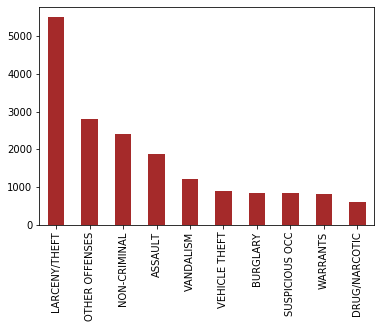

Tuesday


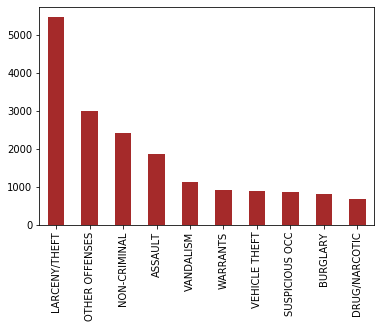

Wednesday


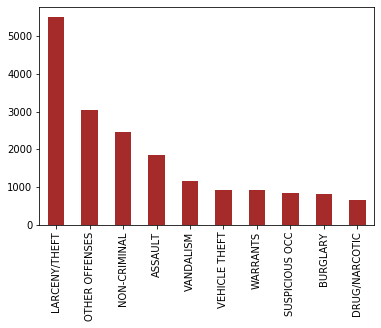

Thursday


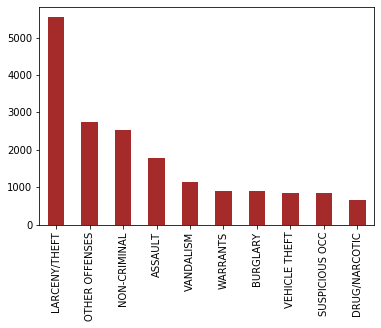

Friday


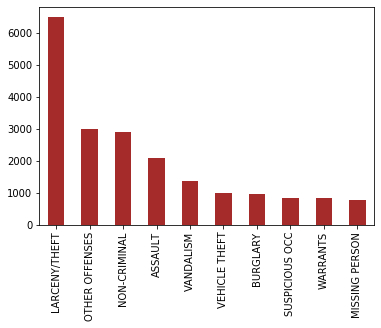

Saturday


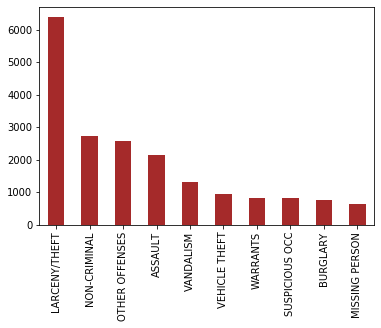

Sunday


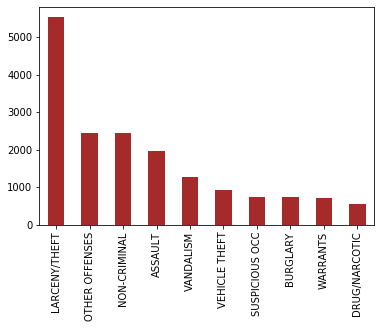

In [10]:
# here we can see by day of the week the ten categories of crime most committed in each day of the week
# mondays were larceny and theft

week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i in week:
    print(i)
    df[df.DAY == i].CATEGORY.value_counts().head(10).plot(kind = 'bar', color='brown')
    plt.show()

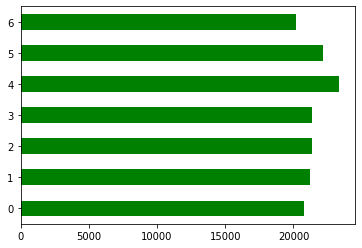

In [11]:
# fridays were the days where more crimes were commited in San Francisco
df.DATE.dt.weekday.value_counts().sort_index().plot(kind = 'barh', color = 'green')

In [12]:
# at what time more crimes were commited in San Francisco
# at 6 pm more crimes were committed

df.TIME.dt.hour.value_counts().sort_index()

0     6941
1     4359
2     3494
3     2553
4     1885
5     1744
6     2518
7     3894
8     5575
9     5865
10    6483
11    6786
12    9021
13    7268
14    7621
15    8329
16    8656
17    9559
18    9718
19    8981
20    8098
21    7480
22    7099
23    6573
Name: TIME, dtype: int64

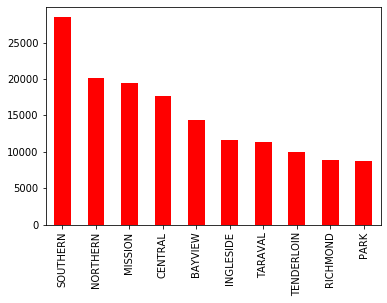

In [13]:
# let's see what the most dangerous district is
df.DISTRICT.value_counts().plot(kind = 'bar', color = 'red')

In [14]:
# the different types of records we find in the RESOLUTION column
df.groupby('RESOLUTION').size()

RESOLUTION
ARREST, BOOKED                             39416
ARREST, CITED                                144
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
COMPLAINANT REFUSES TO PROSECUTE               2
EXCEPTIONAL CLEARANCE                        371
JUVENILE BOOKED                             1056
JUVENILE CITED                                 3
JUVENILE DIVERTED                              2
LOCATED                                       20
NONE                                      107780
NOT PROSECUTED                                22
PROSECUTED BY OUTSIDE AGENCY                   1
PSYCHOPATHIC CASE                             17
UNFOUNDED                                   1608
dtype: int64

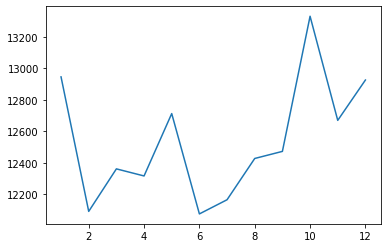

In [15]:
# in 2016 were the first couple month more dangerous than the last month? 
#or the crime rate increased throughout the year?
# here we can see how in the second half of the year the crime rate rapidly increased
df.DATE.dt.month.value_counts().sort_index().plot()

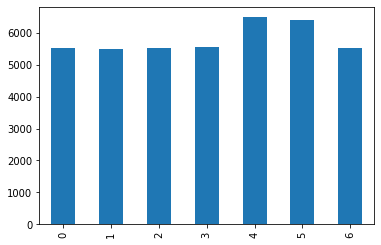

In [17]:
# LARCENY / THEFT is the most frequent category so let's see what day most LARCENY/THEFT were commited
# fridays more LARCENY/THEFT crimes were committed than any other day on the week
df[df.CATEGORY == 'LARCENY/THEFT'].DATE.dt.weekday.value_counts().sort_index().plot(kind = 'bar')

In [20]:
# let's look for the most dangerous address
# we for a fact know that the southern is the most dangerous district
# now we know that the most dangerous address is 800 Block of BRYANT ST 

df[df.DISTRICT == 'SOUTHERN'].ADDRESS.value_counts().head()

800 Block of BRYANT ST     3561
800 Block of MARKET ST     1405
900 Block of MARKET ST      547
0 Block of 6TH ST           347
800 Block of MISSION ST     345
Name: ADDRESS, dtype: int64

In [21]:
# the column PDLD is our primary key with 0 duplicated values
df.PDLD.duplicated().sum()

0

In [ ]:
# summary of our analysis:
# now with the analysis that we've done to this database we now know the following information
# we can see by day of the week the ten categories of crime most committed in each day of the week - Mondays were Larceny and Theft
# fridays were the days where more crimes were commited in San Francisco
# at 6 pm more crimes were committed in San Francisco in 2016
# the most dangerous district is the Southern disctrict
# we can see how in the second half of the year the crime rate rapidly increased - after June the crime rate went up
# fridays more LARCENY/THEFT crimes were committed than any other day on the week
# now we know that the most dangerous address is 800 Block of BRYANT ST

# all this information gives us a much better understanding of the city crime rate. When and where is dangerous 
# and at what type crimes are most likely to happen

# THIS IS A PUBLIC DATABASE THAT I FOUND IN KAGGLE. IT HAS BEEN USED JUST FOR LEARNING PURPOSES.


